In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import sys
import os
import pandas as pd
import itertools

# Caminho absoluto da pasta do projeto (um nível acima)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_path = os.path.join(project_root, "src")

# Adiciona a pasta src ao path
if src_path not in sys.path:
    sys.path.append(src_path)

# Imports do teu projeto
from ga_runner import run_ga

In [2]:
selection_types = ["tournament", "ranking", "roulette"]
crossover_types = ["group", "merge"]
mutation_types = ["swap", "one_point", "multiple_point"]
elitism_options = [True, False]

results = []

for sel, cross, mut, elit in itertools.product(selection_types, crossover_types, mutation_types, elitism_options):
    print("\n")
    print(f"Running: {sel} - {cross} - {mut} - elitism={elit}")
    best_solution, best_score, best_fitness_per_gen = run_ga(
        pop_size=100,
        generations=100,
        elite_size=2,
        use_elitism=elit,
        selection_type=sel,
        crossover_type=cross,
        mutation_type=mut,
        mutation_prob=0.2,
        seed=42
    )
    results.append({
        "selection": sel,
        "crossover": cross,
        "mutation": mut,
        "elitism": elit,
        "history": best_fitness_per_gen,
        "final_score": best_score
    })




Running: tournament - group - swap - elitism=True
Geração 0 | Best fitness: 19752.00
Geração 10 | Best fitness: 22900.00
Geração 20 | Best fitness: 22900.00
Geração 30 | Best fitness: 23350.00
Geração 40 | Best fitness: 23350.00
Geração 50 | Best fitness: 23350.00
Geração 60 | Best fitness: 23350.00
Geração 70 | Best fitness: 23350.00
Geração 80 | Best fitness: 23350.00
Geração 90 | Best fitness: 23350.00


Running: tournament - group - swap - elitism=False
Geração 0 | Best fitness: 19752.00
Geração 10 | Best fitness: 20652.00
Geração 20 | Best fitness: 18785.00
Geração 30 | Best fitness: 18300.00
Geração 40 | Best fitness: 18757.00
Geração 50 | Best fitness: 22557.00
Geração 60 | Best fitness: 21456.00
Geração 70 | Best fitness: 19700.00
Geração 80 | Best fitness: 21595.00
Geração 90 | Best fitness: 22700.00


Running: tournament - group - one_point - elitism=True
Geração 0 | Best fitness: 19752.00
Geração 10 | Best fitness: 21570.00
Geração 20 | Best fitness: 24102.00
Geração 30 | 

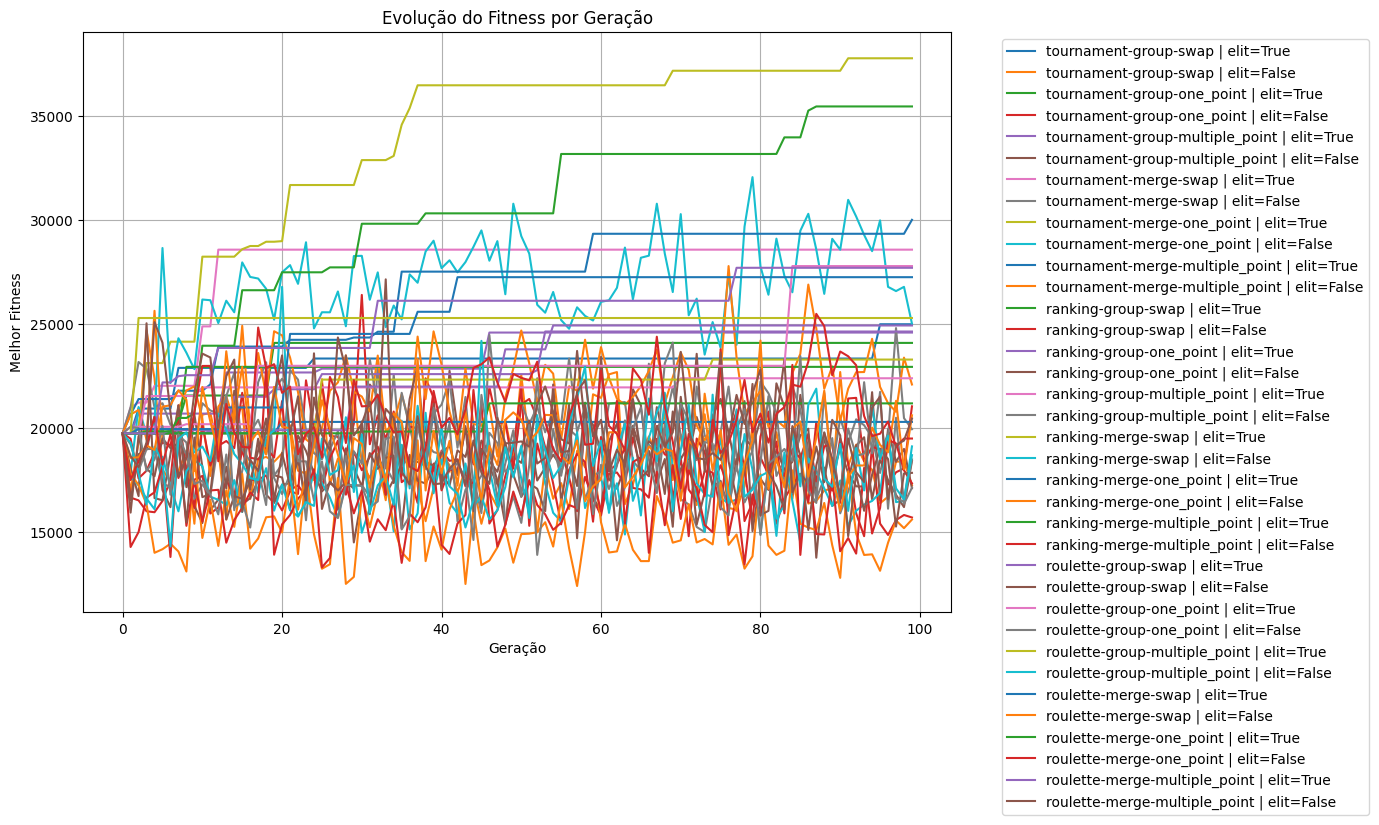

In [3]:
plt.figure(figsize=(14, 8))
for r in results:
    label = f"{r['selection']}-{r['crossover']}-{r['mutation']} | elit={r['elitism']}"
    plt.plot(r["history"], label=label)
plt.xlabel("Geração")
plt.ylabel("Melhor Fitness")
plt.title("Evolução do Fitness por Geração")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
summary = pd.DataFrame([{
    "Selection": r["selection"],
    "Crossover": r["crossover"],
    "Mutation": r["mutation"],
    "Elitism": r["elitism"],
    "Final Score": r["final_score"]
} for r in results])

summary = summary.sort_values(by="Final Score", ascending=False)
summary.reset_index(drop=True, inplace=True)
summary


,Selection,Crossover,Mutation,Elitism,Final Score
0,tournament,merge,one_point,True,37800
1,roulette,merge,one_point,True,35482
2,tournament,merge,multiple_point,True,30025
3,tournament,merge,swap,True,28590
4,roulette,group,one_point,True,27800
5,roulette,merge,multiple_point,True,27717
6,roulette,merge,swap,True,27265
7,roulette,group,multiple_point,True,25300
8,tournament,group,swap,True,25000
9,roulette,group,swap,True,24940
